# What is IForest behavior according to the dataset dimension size?

## Test with 2 dimension dataset

In [1]:
import sys
sys.path.append('../../../../../')
from datasets import datasets as datat
from IForest_DODiMDS import iforest_D as IFD
from metrics import performances
perf = performances.performances()
from metrics import visualization
visu = visualization.visualization()
from metrics import functions
func = functions.functions()

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import matplotlib.cm as cm
from mpl_toolkits import mplot3d


## Generals settings

In [2]:
max_samples = 256
n_trees = 100
threshold = 0.6
min_sample_size = 5
sample_size_step = 5
x_lim = 17
y_lim = 12

## Chargement du jeu de données

In [3]:
dts = datat.synthetic_datasets(path_top="../../../../../")
X_brut, y_transform, full_dataset = dts.TwoD_V4_2_0()
#X_brut.describe()

In [4]:
#dts.description

In [5]:
#full_dataset

In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(X_brut)


             0         1
0     8.247529  4.387897
1     9.069959 -2.267440
2     4.774715  8.597880
3     7.201157  6.846688
4     5.215616 -8.449529
5    -7.820375 -5.230765
6     9.344492 -1.869171
7     2.209133 -9.081435
8    -4.703715  8.092484
9    -0.624418 -9.403657
10    2.181233 -9.073588
11   -2.074991  9.198243
12   -0.366599  9.613316
13   -9.032572 -2.006429
14   -9.833627  1.197827
15    7.345372 -5.323064
16    9.158216  0.908160
17    6.157717 -7.758228
18   -2.872521  8.912358
19   -8.385068 -4.191234
20    0.908719  9.541465
21   -6.118722  7.675859
22    8.588074 -3.407865
23   -5.193046 -7.518774
24   -4.591585 -8.457704
25   -7.255488  5.702827
26   -7.972981  5.227574
27   -9.119043 -1.810929
28    8.501061  4.622916
29    4.219598  8.659679
30    9.828632 -0.031127
31   -6.790960  7.335290
32    2.688111 -9.111013
33    8.026419 -4.943456
34   -9.601547 -2.648503
35    8.726281  3.185378
36   -9.317471  1.722403
37   -6.720917 -7.016391
38    2.144133 -8.881083


In [7]:
#y_transform.describe()

In [8]:
#y_transform

## Execution of IForest to see the variance of the result

In [9]:
roc_aucs = []
specificities = []
fars = []
for i in range(10):
    print("---------------------------------N°"+str(i)+"----------------------------------------------------")
    # Instanciation, fit and predict
    #func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    #func_IFD.fit(X_brut)
    #IFD_y_pred_IF, IFD_scores = func_IFD.predict(X=X_brut, threshold=threshold)
    IFD_y_pred_IF, IFD_scores, X_normal, X_abnormal, result_dataset = func.execute_IForest(X_brut=X_brut, max_samples=max_samples, 
                                                     n_trees=n_trees, threshold=threshold)
    
    ttn, tfp, tfn, ttp, cm, auc, spec, prec, rec, f1, far  = perf.performance_summary(IFD_y_pred_IF, y_transform,
                                                                                      IFD_scores)
    
    # False Alarm Rate
    fars.append(far)
    #ROC AUC
    roc_aucs.append(auc)
    # Specificity
    specificities.append(spec)
    
perf.resume_table(roc_aucs, table_name="ROC AUC")
print("")
perf.resume_table(specificities, table_name="Specificity")
print("")
perf.resume_table(fars, table_name="False Alert Rate")

min_far = min(fars)
max_specificity = max(specificities)
max_roc_auc = max(roc_aucs)

---------------------------------N°0----------------------------------------------------
Confusion matrice
[[   6    9]
 [  84 1416]]
ROC AUC : 0.6719999999999999
Specificity : 0.4
Precision : 0.9936842105263158
Recall : 0.944
f1_score : 0.9682051282051282
False alarm rate (%) : 5.600000000000005
****************************************************************
---------------------------------N°1----------------------------------------------------
Confusion matrice
[[   9    6]
 [  99 1401]]
ROC AUC : 0.7670000000000001
Specificity : 0.6
Precision : 0.9957356076759062
Recall : 0.934
f1_score : 0.9638802889576884
False alarm rate (%) : 6.599999999999994
****************************************************************
---------------------------------N°2----------------------------------------------------
Confusion matrice
[[  13    2]
 [  90 1410]]
ROC AUC : 0.9033333333333333
Specificity : 0.8666666666666667
Precision : 0.9985835694050992
Recall : 0.94
f1_score : 0.9684065934065934
Fal

## Execution of IForest to see the map of the result

Confusion matrice
[[  15    0]
 [ 109 1391]]
ROC AUC : 0.9636666666666667
Specificity : 1.0
Precision : 1.0
Recall : 0.9273333333333333
f1_score : 0.9622967831200276
False alarm rate (%) : 7.266666666666666
****************************************************************
Model is an instance of IsolationForest


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


Abnormal predicted data
             0         1         2
14   -9.833627  1.197827  0.628425
30    9.828632 -0.031127  0.625616
34   -9.601547 -2.648503  0.605090
50    9.770576  0.818329  0.615401
55   -9.753306 -1.473940  0.619765
57    0.734276 -9.830159  0.624980
63   -1.499269  9.885414  0.648732
69    9.955211  0.067153  0.667608
75   -9.799659  0.984891  0.620175
148   3.484144  9.355361  0.602077
152  -2.840284  9.468594  0.604002
179  -0.451839  9.777148  0.602791
208   1.842065  9.706473  0.610112
213   9.779415 -1.926087  0.619532
217   9.997653 -0.203323  0.676772
229   9.754925  2.047267  0.622719
242  -9.801234 -1.238547  0.631179
247  -0.879039 -9.772865  0.616266
256   9.821718  0.268068  0.627221
263   9.803434  1.451223  0.625529
265   9.966151 -0.477525  0.669156
276  -1.994194 -9.759416  0.626024
287  -9.694952  1.675241  0.605057
293   9.785275 -0.923682  0.611104
321   9.827673 -1.832874  0.628365
322   1.128710  9.854103  0.633559
326  -9.829418  0.783630  0.625

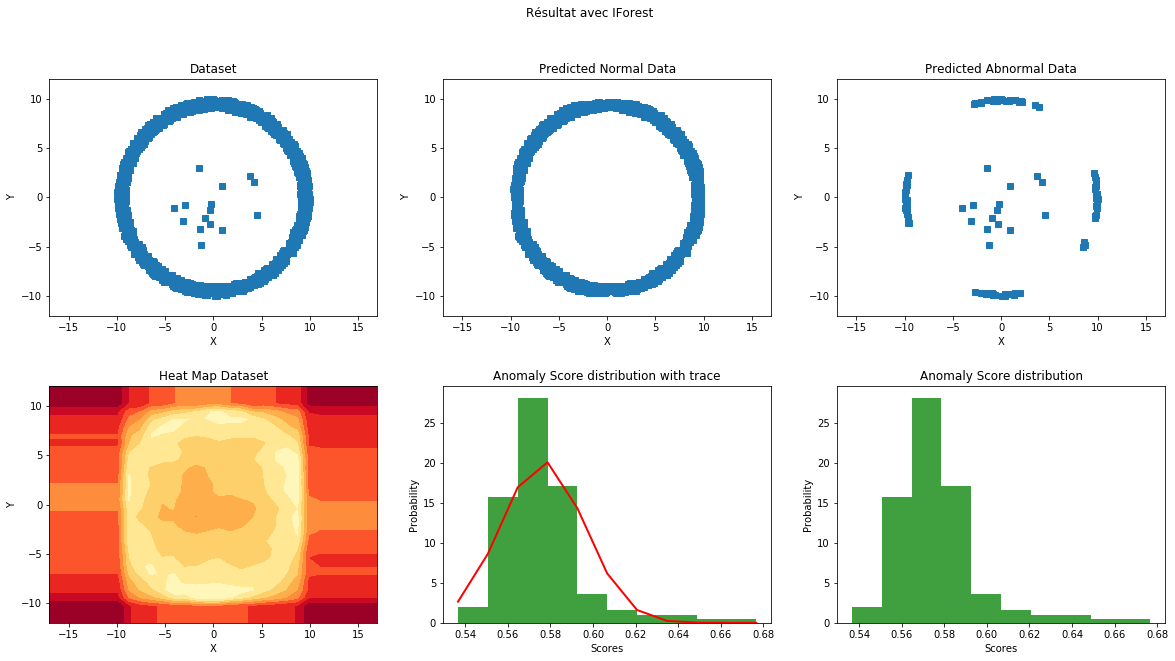

In [4]:
#IFD_y_pred_IF, IFD_scores = func.execute_IForest(X_brut=X_brut, max_samples=max_samples, n_trees=n_trees, 
#                                                 threshold=threshold)

func_IF, IFD_y_pred_IF, IFD_scores, IFD_paths_length, X_normal, X_abnormal, result_dataset = func.execute_IForest_GivenPathLength(X_brut=X_brut, max_samples=max_samples, n_trees=n_trees, 
                                                 threshold=threshold)

ttn, tfp, tfn, ttp, cm, auc, spec, prec, rec, f1, far  = perf.performance_summary(IFD_y_pred_IF, y_transform, IFD_scores)

fig, axs, normal, abnormal, all_dataset_with_scores = visu.result_description_2D(title='Résultat avec IForest', 
                                      scores=IFD_scores, X_brut=X_brut, y_brut = y_transform, X_normal=X_normal, 
                                                                                 X_abnormal=X_abnormal, 
                                      x_lim=x_lim, y_lim=y_lim, outlier_label=-1, pathLength=IFD_paths_length, 
                                                                                 model=func_IF)
fig.show()

print("Abnormal predicted data")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(X_abnormal)
#print("data_path_length")
#print(data_path_length)

## Execution of IForest to see the best threshold

---------------------------------Threshold = 0.1----------------------------------------------------
Confusion matrice
[[  15    0]
 [1500    0]]
ROC AUC : 0.5
Specificity : 1.0
Precision : 0.0
Recall : 0.0
f1_score : 0.0
False alarm rate (%) : 100.0
****************************************************************
---------------------------------Threshold = 0.2----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
ROC AUC : 0.5
Specificity : 1.0
Precision : 0.0
Recall : 0.0
f1_score : 0.0
False alarm rate (%) : 100.0
****************************************************************
---------------------------------Threshold = 0.30000000000000004----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
ROC AUC : 0.5
Specificity : 1.0
Precision : 0.0
Recall : 0.0
f1_score : 0.0
False alarm rate (%) : 100.0
****************************************************************
---------------------------------Threshold = 0.4----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
ROC AUC : 0.5
Specificity : 1.0
Precision : 0.0
Recall : 0.0
f1_score : 0.0
False alarm rate (%) : 100.0
****************************************************************
---------------------------------Threshold = 0.5----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
ROC AUC : 0.5
Specificity : 1.0
Precision : 0.0
Recall : 0.0
f1_score : 0.0
False alarm rate (%) : 100.0
****************************************************************
---------------------------------Threshold = 0.6----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [ 146 1354]]
ROC AUC : 0.9513333333333334
Specificity : 1.0
Precision : 1.0
Recall : 0.9026666666666666
f1_score : 0.9488437281009109
False alarm rate (%) : 9.733333333333338
****************************************************************
---------------------------------Threshold = 0.7000000000000001----------------------------------------------------
Confusion matrice
[[   0   15]
 [   0 1500]]
ROC AUC : 0.5
Specificity : 0.0
Precision : 0.9900990099009901
Recall : 1.0
f1_score : 0.9950248756218906
False alarm rate (%) : 0.0
****************************************************************
---------------------------------Threshold = 0.8----------------------------------------------------
Confusion matrice
[[   0   15]
 [   0 1500]]
ROC AUC : 0.5
Specificity : 0.0
Precision : 0.9900990099009901
Recall : 1.0
f1_score : 0.9950248756218906
False alarm rate (%) : 0.0
****************************************************************
-------------------------

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


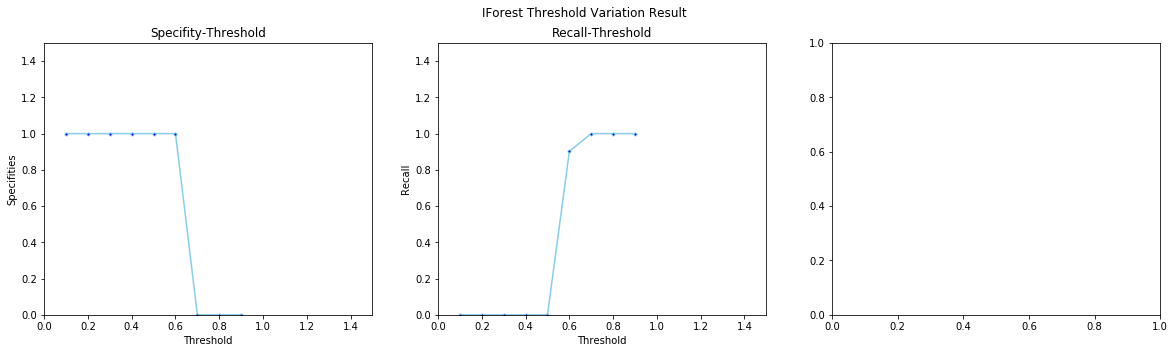

In [11]:
# Varier le seuil de décision pour voir l'impact
specs=[]
recalls=[]
for i in np.arange(0.1, 1., 0.1):
    print("---------------------------------Threshold = "+str(i)+"----------------------------------------------------")
    # Instanciation, fit and predict
    IFD_y_pred_IF, IFD_scores, X_normal, X_abnormal, result_dataset = func.execute_IForest(X_brut=X_brut, max_samples=max_samples, n_trees=n_trees, 
                                                     threshold=i)

    ttn, tfp, tfn, ttp, cm, auc, spec, prec, rec, f1, far  = perf.performance_summary(IFD_y_pred_IF, y_transform, 
                                                                                      IFD_scores)
    specs.append(spec)
    recalls.append(rec)
fig, axs = visu.specifity_recall("IForest Threshold Variation Result", np.arange(0.1, 1., 0.1), specs, recalls)    
fig.show()

## Execution Of EIF on dataset

Confusion matrice
[[   5   10]
 [   0 1500]]
ROC AUC : 0.6666666666666667
Specificity : 0.3333333333333333
Precision : 0.9933774834437086
Recall : 1.0
f1_score : 0.9966777408637874
False alarm rate (%) : 0.0
****************************************************************
Model is not an instance of IsolationForest


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


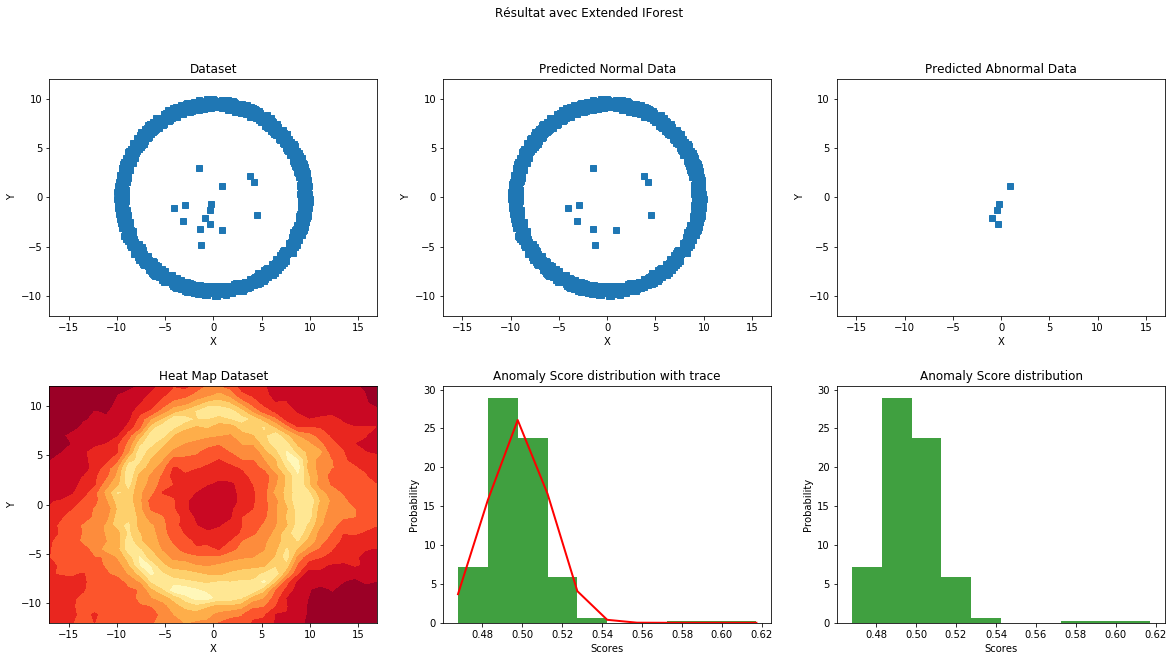

In [5]:
F1, P1, S1, pathsLength, X_normal, X_abnormal, result_dataset = func.execute_EIF(X_brut=X_brut, max_samples=max_samples, n_trees=n_trees, threshold=threshold)

ttn, tfp, tfn, ttp, cm, auc, spec, prec, rec, f1, far  = perf.performance_summary(P1, y_transform, S1)

fig, axs, normal, abnormal, all_dataset_with_scores = visu.result_description_2D(title='Résultat avec Extended IForest', 
                                      scores=S1, X_brut=X_brut, y_brut = y_transform,X_normal=X_normal, 
                                                                                 X_abnormal=X_abnormal, 
                                      x_lim=x_lim, y_lim=y_lim, outlier_label=-1, pathLength=pathsLength, model=F1)
fig.show()

---------------------------------Threshold = 0.1----------------------------------------------------
Confusion matrice
[[  15    0]
 [1500    0]]
ROC AUC : 0.5
Specificity : 1.0
Precision : 0.0
Recall : 0.0
f1_score : 0.0
False alarm rate (%) : 100.0


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


****************************************************************
---------------------------------Threshold = 0.2----------------------------------------------------
Confusion matrice
[[  15    0]
 [1500    0]]
ROC AUC : 0.5
Specificity : 1.0
Precision : 0.0
Recall : 0.0
f1_score : 0.0
False alarm rate (%) : 100.0
****************************************************************
---------------------------------Threshold = 0.30000000000000004----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
ROC AUC : 0.5
Specificity : 1.0
Precision : 0.0
Recall : 0.0
f1_score : 0.0
False alarm rate (%) : 100.0
****************************************************************
---------------------------------Threshold = 0.4----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
ROC AUC : 0.5
Specificity : 1.0
Precision : 0.0
Recall : 0.0
f1_score : 0.0
False alarm rate (%) : 100.0
****************************************************************
---------------------------------Threshold = 0.5----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1196  304]]
ROC AUC : 0.6013333333333333
Specificity : 1.0
Precision : 1.0
Recall : 0.20266666666666666
f1_score : 0.3370288248337029
False alarm rate (%) : 79.73333333333333
****************************************************************
---------------------------------Threshold = 0.6----------------------------------------------------
Confusion matrice
[[  10    5]
 [   0 1500]]
ROC AUC : 0.8333333333333334
Specificity : 0.6666666666666666
Precision : 0.9966777408637874
Recall : 1.0
f1_score : 0.9983361064891847
False alarm rate (%) : 0.0
****************************************************************
---------------------------------Threshold = 0.7000000000000001----------------------------------------------------
Confusion matrice
[[   0   15]
 [   0 1500]]
ROC AUC : 0.5
Specificity : 0.0
Precision : 0.9900990099009901
Recall : 1.0
f1_score : 0.9950248756218906
False alarm rate (%) : 0.0
***********************************************************

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


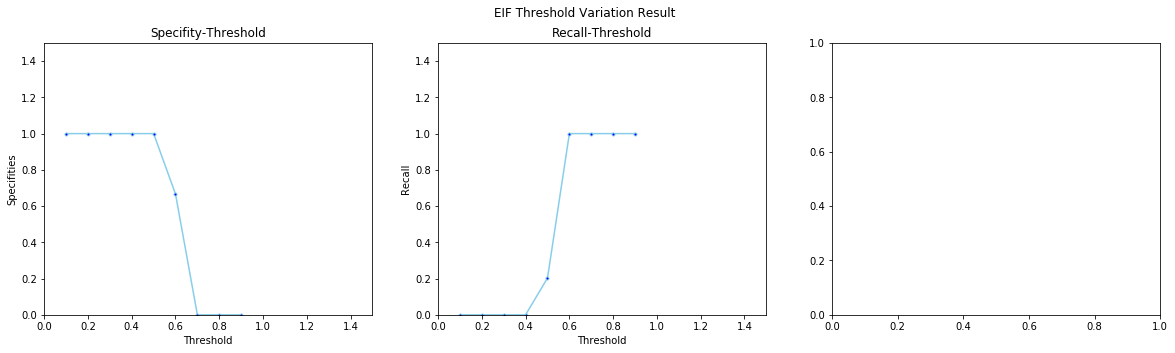

In [13]:
# Varier le seuil de décision pour voir l'impact
specs=[]
recalls=[]
for i in np.arange(0.1, 1., 0.1):
    print("---------------------------------Threshold = "+str(i)+"----------------------------------------------------")
    # Instanciation, fit and predict
    P1, S1 = func.execute_EIF(X_brut=X_brut, max_samples=max_samples, n_trees=n_trees, threshold=i)
    
    ttn, tfp, tfn, ttp, cm, auc, spec, prec, rec, f1, far  = perf.performance_summary(P1, y_transform, S1)
    
    specs.append(spec)
    recalls.append(rec)
fig, axs = visu.specifity_recall("EIF Threshold Variation Result", np.arange(0.1, 1., 0.1), specs, recalls)
fig.show()

EIF ne détecte pas toutes les anomalies mais détecte toutes les données normales

## Conclusion

IForest ne détecte pas toutes les anomalies et fais de fausses alertes.

In [16]:
np.log(8)

AttributeError: module 'numpy' has no attribute 'log3'